# Markov Localization

## 1. Localization Posterior

### a) Formal Definition of Variables

z_1:t represents the observation vector from time 0 to t (range measurements, bearing, images, etc.).

u_1:t represents the control vector from time 0 to t (yaw/pitch/roll rates and velocities).

m represents the map (grid maps, feature maps, landmarks)

x_t represents the pose (position (x,y) + orientation θ)

#### The Posterior distribution for the state x at time t

bel(x_t) = p(x_t | z_{1:t}, u_{1:t}, m)

#### Simultaneous localization and mapping (SLAM)

p(x_t, m | z_{1:t}, u_{1:t})


### b) Landmark Based 1D Map

#### Observation List

Detect the k nearest objects in the driving direction

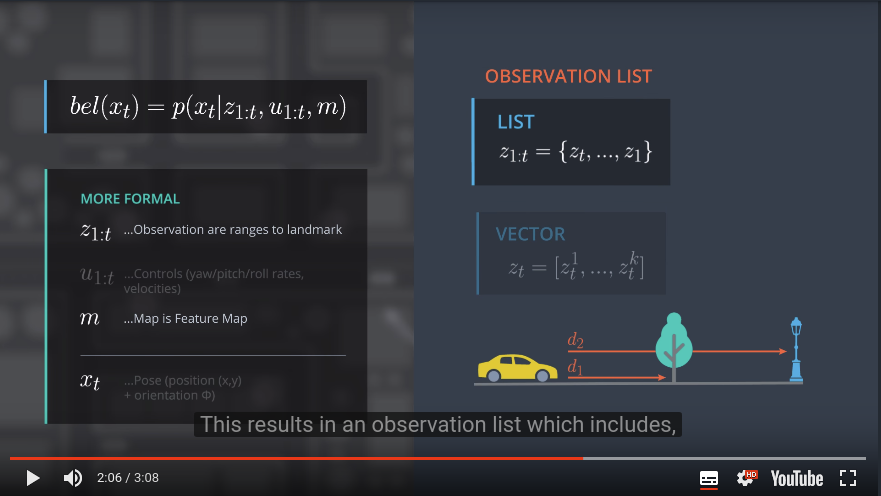

#### Control Vector

The control vector includes a direct move of the car between consecutive time stamps

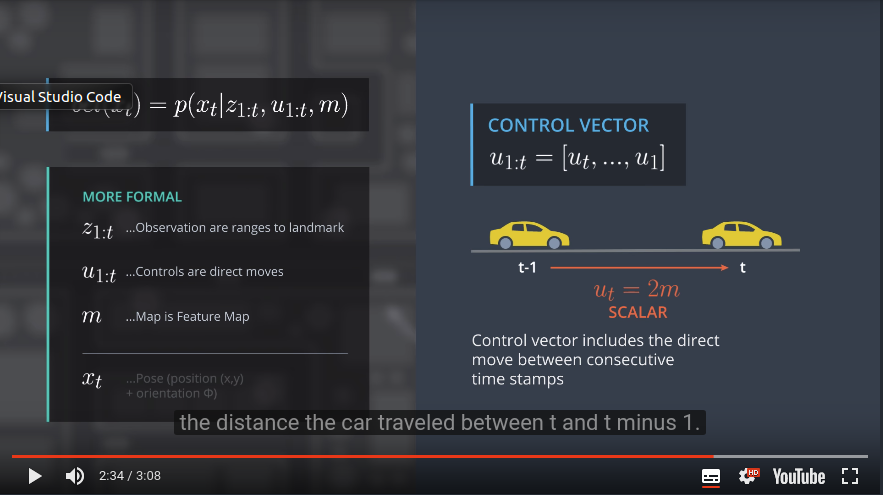

#### Pose Range Space

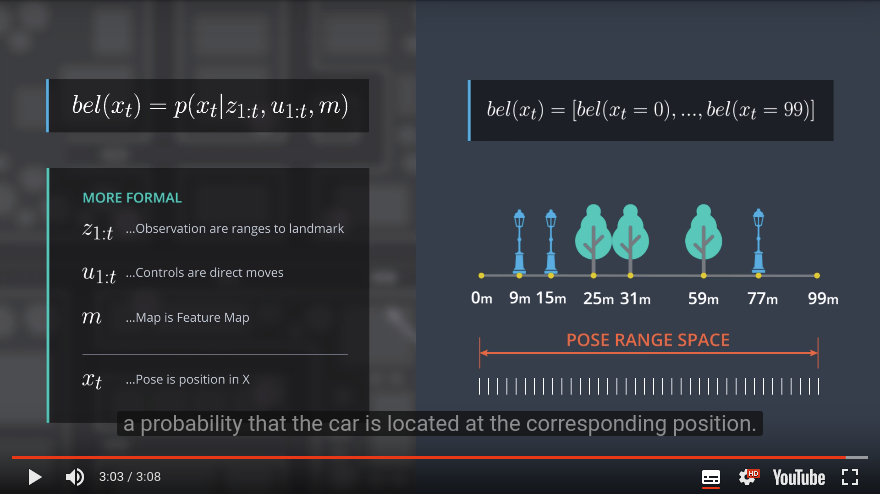

## 2. Bayes' Rule

Before we dive into deeper into Markov localization, we should review Bayes' Rule. This will serve as a refresher for those familiar with Bayesian methods and we provide some additional resources for those less familiar.

Recall that Bayes' Rule enables us to determine the conditional probability of a state given evidence P(a|b) by relating it to the conditional probability of the evidence given the state P(b|a) in the form of:

P(a)∗P(b∣a) = P(b)∗P(a∣b)

which can be rearranged to:

P(a∣b) = P(b∣a)∗P(a) / P(b)

In other words the probability of state a, given evidence b, is the probability of evidence b, given state a, multiplied by the probability of state a, normalized by the total probability of b over all states.

Let's move on to an example to illustrate the utility of Bayes' Rule.

### Bayes' Rule Applied

Let's say we have two bags of marbles, bag 1 and bag 2, filled with two types of marbles, red and blue. Bag 1 contains 10 blue marbles and 30 red marbles, whereas bag 2 contains 20 of each color marble.

If a friend were to choose a bag at random and then a marble at random, from that bag, how can we determine the probability that that marble came from a specific bag? You guessed it - Bayes' Rule!

In this scenario, our friend produces a red marble, in that case, what is the probability that the marble came from bag 1? Rewriting this in terms of Bayes' Rule, our solution becomes:

P(Bag1∣Red)= P(Red∣Bag1)P(Bag1) / P(Red)

P(Bag1∣Red)= 0.6

### Bayesian Methods Resources

* [Sebastian Discusses Bayes Rule](https://classroom.udacity.com/nanodegrees/nd013/parts/30260907-68c1-4f24-b793-89c0c2a0ad32/modules/28233e55-d2e8-4071-8810-e83d96b5b092/lessons/3c8dae65-878d-4bee-8c83-70e39d3b96e0/concepts/487221690923?contentVersion=2.0.0&contentLocale=en-us)
* [More Bayes Rule Content from Udacity](https://classroom.udacity.com/courses/st101/lessons/48703346/concepts/483698470923)
* [Bayes Rule with Ratios](https://betterexplained.com/articles/understanding-bayes-theorem-with-ratios)
* [A Deep Dive into Bayesian Methods, for Programmers](http://greenteapress.com/wp/think-bayes/)

## 3. Bayes' Filter For Localization

We can apply Bayes' Rule to vehicle localization by passing variables through Bayes' Rule for each time step, as our vehicle moves. This is known as a Bayes' Filter for Localization. We will cover the specific as the lesson continues, but the generalized form Bayes' Filter for Localization is shown below. You may recognize this as being similar to a Kalman filter. In fact, many localization filters, including the Kalman filter are special cases of Bayes' Filter.

Remember the general form for Bayes' Rule:

P(a∣b) = P(b∣a)P(a) / P(b)
 
With respect to localization, these terms are:

1. P(location∣observation): This is P(a|b), the **normalized** probability of a position given an observation (posterior).
2. P(observation∣location): This is P(b|a), the probability of an observation given a position (likelihood)
3. P(location): This is P(a), the prior probability of a position
4. P(observation): This is P(b), the total probability of an observation

Without going into detail yet, be aware that P(location) is determined by the motion model. The probability returned by the motion model is the product of the transition model probability (the probability of moving from x_{t-1} --> x_t and the probability of the state x_{t-1}

Over the course of this lesson, you’ll build your own Bayes’ filter. In the next few quizzes, you’ll write code to:

1. Compute Bayes’ rule
2. Calculate Bayes' posterior for localization
3. Initialize a prior belief state
4. Create a function to initialize a prior belief state given landmarks and assumptions

## 4. Calculate Localization Posterior

To continue developing our intuition for this filter and prepare for later coding exercises, let's walk through calculations for determining posterior probabilities at several pseudo positions x, for a single time step. We will start with a time step after the filter has already been initialized and run a few times. We will cover initialization of the filter in an upcoming concept.

pseudo_position (x)	P(location)	P(observation∣location)	Raw P(location∣observation)	Normalized P(location∣observation)
1	1.67E-02	0.00E+00	0.00E+00	0.00E+00
2	3.86E-02	6.99E-03	?	2.59E-02
3	4.90E-02	8.52E-02	4.18E-03	4.01E-01
4	3.86E-02	?	5.42E-03	5.21E-01
5	1.69E-02	3.13E-02	5.31E-04	5.10E-02
6	6.51E-03	9.46E-04	6.16E-06	?
7	?	3.87E-06	6.55E-08	6.29E-06
8	3.86E-02	0.00E+00	0.00E+00	0.00E+00

**Normalized P(location_observation) vs. Raw P(location|observation):** The **Raw P(location|observation)** is the result prior to dividing by the total probability of P(observation), the P(b) term (denominator) of the generalized Bayes' rule. The **normalized P(location|observation)** is the result of after dividing by P(observation).

Remember the general form for Bayes' Rule:

